In [1]:
!wget -P ./data https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet

--2025-05-19 08:17:11--  https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 2600:9000:2123:c200:b:20a5:b140:21, 2600:9000:2123:c600:b:20a5:b140:21, 2600:9000:2123:fe00:b:20a5:b140:21, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|2600:9000:2123:c200:b:20a5:b140:21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47673370 (45M) [application/x-www-form-urlencoded]
Saving to: ‘./data/yellow_tripdata_2023-01.parquet.1’

yellow_tripdata_202 100%[===================>]  45,46M  14,3MB/s    in 4,3s    

2025-05-19 08:17:16 (10,6 MB/s) - ‘./data/yellow_tripdata_2023-01.parquet.1’ saved [47673370/47673370]



In [2]:
!wget -P ./data https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet

--2025-05-19 08:17:17--  https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 2600:9000:2123:200:b:20a5:b140:21, 2600:9000:2123:d000:b:20a5:b140:21, 2600:9000:2123:9600:b:20a5:b140:21, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|2600:9000:2123:200:b:20a5:b140:21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47748012 (46M) [application/x-www-form-urlencoded]
Saving to: ‘./data/yellow_tripdata_2023-02.parquet.1’

yellow_tripdata_202 100%[===================>]  45,54M  16,0MB/s    in 2,9s    

2025-05-19 08:17:20 (16,0 MB/s) - ‘./data/yellow_tripdata_2023-02.parquet.1’ saved [47748012/47748012]



In [30]:
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
yd_2023_01 = pd.read_parquet('./data/yellow_tripdata_2023-01.parquet')
yd_2023_02 = pd.read_parquet('./data/yellow_tripdata_2023-02.parquet')

In [3]:
yd_2023_01.shape # 19 columns

(3066766, 19)

In [4]:
yd_2023_01.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [5]:
yd_2023_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [6]:
yd_2023_02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2913955 entries, 0 to 2913954
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

In [9]:
def compute_duration(df):
    """
    Compute the duration of each trip in minutes.
    """
    df2 = df.copy()
    df2["tpep_dropoff_datetime"] = pd.to_datetime(df2["tpep_dropoff_datetime"])
    df2["tpep_pickup_datetime"] = pd.to_datetime(df2["tpep_pickup_datetime"])
    df2["duration"] = (df2["tpep_dropoff_datetime"] - df2["tpep_pickup_datetime"]).dt.total_seconds() / 60
    return df2

In [10]:
yd_2023_01_adj = compute_duration(yd_2023_01)
yd_2023_02_adj = compute_duration(yd_2023_02)

In [12]:
yd_2023_01_adj.describe() # duration std: 4.259435e+01

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
count,3.066766e+06,3066766,3066766,2.995023e+06,3.066766e+06,2.995023e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,2.995023e+06,2.995023e+06,3.066766e+06
mean,1.730215e+00,2023-01-17 00:22:26.288164,2023-01-17 00:38:06.427874,1.362532e+00,3.847342e+00,1.497440e+00,1.663980e+02,1.643926e+02,1.194483e+00,1.836707e+01,1.537842e+00,4.882900e-01,3.367941e+00,5.184907e-01,9.820847e-01,2.702038e+01,2.274231e+00,1.074086e-01,1.566900e+01
min,1.000000e+00,2008-12-31 23:01:42,2009-01-01 14:29:11,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-9.000000e+02,-7.500000e+00,-5.000000e-01,-9.622000e+01,-6.500000e+01,-1.000000e+00,-7.510000e+02,-2.500000e+00,-1.250000e+00,-2.920000e+01
25%,1.000000e+00,2023-01-09 16:21:57.250000,2023-01-09 16:37:06,1.000000e+00,1.060000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,8.600000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.540000e+01,2.500000e+00,0.000000e+00,7.116667e+00
50%,2.000000e+00,2023-01-17 08:42:29.500000,2023-01-17 08:58:30.500000,1.000000e+00,1.800000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.280000e+01,1.000000e+00,5.000000e-01,2.720000e+00,0.000000e+00,1.000000e+00,2.016000e+01,2.500000e+00,0.000000e+00,1.151667e+01
75%,2.000000e+00,2023-01-24 16:26:27,2023-01-24 16:42:49,1.000000e+00,3.330000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.050000e+01,2.500000e+00,5.000000e-01,4.200000e+00,0.000000e+00,1.000000e+00,2.870000e+01,2.500000e+00,0.000000e+00,1.830000e+01
max,2.000000e+00,2023-02-01 00:56:53,2023-02-02 09:28:47,9.000000e+00,2.589281e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,1.160100e+03,1.250000e+01,5.316000e+01,3.808000e+02,1.969900e+02,1.000000e+00,1.169400e+03,2.500000e+00,1.250000e+00,1.002918e+04
std,4.438480e-01,NaN,NaN,8.961200e-01,2.495838e+02,6.474767e+00,6.424413e+01,6.994368e+01,5.294762e-01,1.780782e+01,1.789592e+00,1.034641e-01,3.826759e+00,2.017579e+00,1.833529e-01,2.216359e+01,7.718454e-01,3.556511e-01,4.259435e+01


<Axes: >

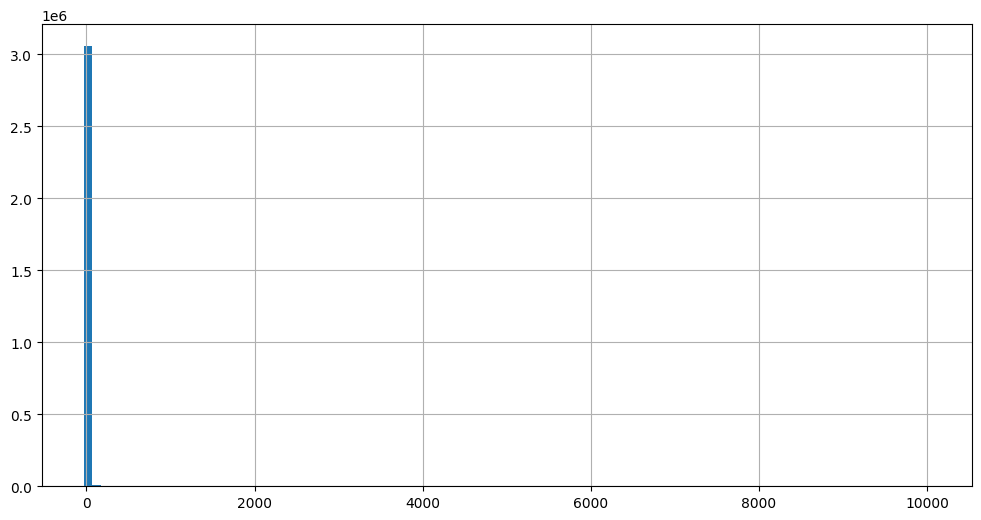

In [13]:
yd_2023_01_adj.duration.hist(bins=100, figsize=(12, 6))

In [14]:
def clean_data(df):
    """
    Clean the data by removing outliers.
    """
    df2 = df.copy()
    df2 = df2[df2["duration"] > 0]
    df2 = df2[df2["duration"] < 60]
    return df2

In [15]:
yd_2023_01_adj = clean_data(yd_2023_01_adj)
yd_2023_02_adj = clean_data(yd_2023_02_adj)

In [ ]:
yd_2023_01_adj.shape[0] / yd_2023_01.shape[0] # 0.9917104858994785

0.9917104858994785

<Axes: >

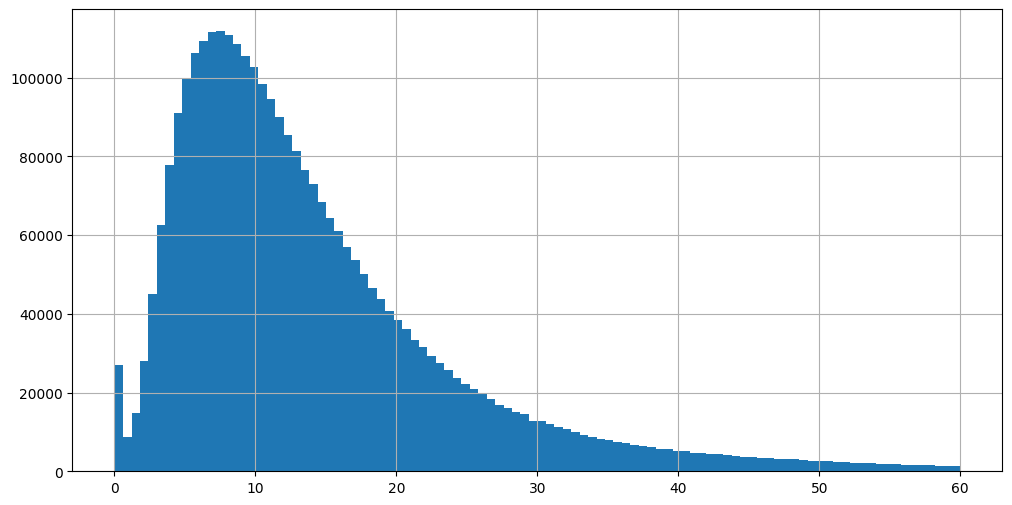

In [16]:
yd_2023_01_adj.duration.hist(bins=100, figsize=(12, 6))

In [17]:
yd_2023_01_adj.head(2)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.0,0.5,0.0,0.0,1.0,14.3,2.5,0.0,8.433333
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.0,0.5,4.0,0.0,1.0,16.9,2.5,0.0,6.316667


In [27]:
def apply_one_hot_encoding(df, feature_columns=["PULocationID", "DOLocationID"], train=True, dv=None):
    """
    Apply one-hot encoding to the data.
    """
    if train:
        df2 = df.copy()
        for col in feature_columns:
            df2[col] = df2[col].astype(str)
        dv = DictVectorizer()
        df_dict = df2[feature_columns].to_dict(orient="records")
        dv.fit(df_dict)
        X = dv.transform(df_dict)
        y = df2["duration"].values
        feature_names = dv.get_feature_names_out()
        return dv, X, y, feature_names
    else:
        if dv is not None:
            df2 = df.copy()
            for col in feature_columns:
                df2[col] = df2[col].astype(str)
            df_dict = df2[feature_columns].to_dict(orient="records")
            X = dv.transform(df_dict)
            y = df2["duration"].values
            return X, y
        else:
            raise ValueError("dv is None. Please fit the DictVectorizer first.")

In [28]:
dv, X_train, y_train, feature_names = apply_one_hot_encoding(yd_2023_01_adj, train=True)
X_train.shape # (3041344, 517)

(3041344, 517)

In [ ]:
X_val, y_val = apply_one_hot_encoding(yd_2023_02_adj, train=False, dv=dv)
X_val.shape # (2886378, 517)

(2886378, 517)

In [33]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = linear_model.predict(X_train)
mse = mean_squared_error(y_train, y_pred, squared=False)

print(f"RMSE on training: {mse:.2f}") # RMSE on training: 7.92

y_pred = linear_model.predict(X_val)
mse = mean_squared_error(y_val, y_pred, squared=False)  
print(f"RMSE on validation: {mse:.2f}") # RMSE on validation: 8.09

RMSE on training: 7.92
RMSE on validation: 8.09
